In [112]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def add_noise(f, sigma=0.02):
    # data with noise
    def tmp(x):
        return f(x) + np.random.normal(scale=sigma)
    tmp.w = f.w
    return tmp
    
def generate_poly_fn(degree=1):
    # prior data
    '''
    @degree : the degree of polynom to generate
    @return : function which generate polynom
    '''
    
    w = np.random.rand(degree + 1) - 0.5
    a = np.arange(0, degree + 1)
    def tmp(x):
        return np.sum(w * (x ** a))
    tmp.w = w
    return tmp

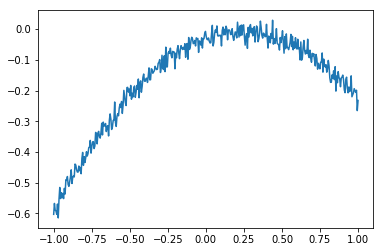

In [153]:
f = add_noise(generate_poly_fn(degree=2))
x = np.linspace(-1, 1, 400)
y = np.apply_along_axis(f, 1, x.reshape((-1,1)))
plt.plot(x, y)
plt.show()

In [154]:
def generate_poly_data(f, degree=1, a=-10, b=10, N=10000):
    d = np.arange(0, degree + 1).reshape((1, -1))
    X = np.linspace(a, b, N).reshape((-1, 1))
    y = np.apply_along_axis(f, 1, X)
    return X**d, y

In [155]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [156]:
f = add_noise(generate_poly_fn())
X, y = generate_poly_data(f)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [157]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7500, 2) (7500,) (2500, 2) (2500,)


# Example

In [158]:
regr = Ridge(alpha=1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.016059321267399753, 0.0003969254528052664)

# Exercises

1) for all alpha in range (0, 1) train Ridge, Lasso on data

2) crossvalidation http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

3) we have two degree variable: degree of data and degree of prior model, experiment with its parameters
    1. How regulariazation affect on data_degree < model_degree
    2. How regulariazation affect on data_degree == model_degree
    3. Compare coefficients of regression and prior data

In [159]:
models = [Ridge, Lasso]
for model in models:
    for alpha in np.linspace(0.001, 1, 10):
        regr = model(alpha=alpha)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        print(regr)
        print("abs err: %f, square err: %f" % (mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err: 0.016059, square err: 0.000397
Ridge(alpha=0.112, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err: 0.016059, square err: 0.000397
Ridge(alpha=0.223, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err: 0.016059, square err: 0.000397
Ridge(alpha=0.334, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err: 0.016059, square err: 0.000397
Ridge(alpha=0.445, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err: 0.016059, square err: 0.000397
Ridge(alpha=0.556, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
abs err:

In [163]:
print(cross_val_score(Ridge(0.3), X, y))
print(cross_val_score(Lasso(0.3), X, y))

[0.99648973 0.99635608 0.99641437]
[0.61712894 0.99501708 0.61423729]


In [167]:
for model in models:
    regr = model(alpha=0.1)
    regr.fit(X_train, y_train)
    print(regr)
    print(regr.intercept_, regr.coef_, f.w)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.3625510219166401 [ 0.         -0.17307729] [ 0.36207442 -0.17297912]
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.3625411036653745 [ 0.         -0.17009256] [ 0.36207442 -0.17297912]
